In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d

In [131]:
# Definimos la cuadricula Lattice
xi,xf,N = -1.,1.,10
x = np.linspace(xi,xf,N)
y = x.copy()
z = y.copy()

In [132]:
X,Y,Z=np.meshgrid(x,y,z)

In [133]:
#fig = plt.figure(figsize=(6,6))
#ax = fig.add_subplot(1,1,1,projection='3d')
#ax.scatter(X,Y,Z)

In [134]:
# Calculamos la carga
def GetCharges(N=2):
    
    Q = np.zeros(N)
    r = np.zeros((N,3))
    
    Q[0] = 10.
    Q[1] = -10.
    
    
    r[0] = [ 0.05,0.1,0.05]
    r[1] = [ 0.05,-0.1,0.05]
    
    #for i in range(N):
    #    if i%2 == 0:
    #        Q[i] = 1
    #    else:
    #        Q[i] = -1
    #    r[i] = [ np.random.uniform(-10,10),np.random.uniform(-10,10) ]
        
        
    #for i in range(N):
    #    if i%2 == 0:
    #        Q[i] = 1
    #    else:
    #        Q[i] = +1
    #    r[i] = [ 1*np.cos(2*np.pi/N*i), 1*np.sin(2*np.pi/N*i), 0 ]
        #r[i] = [ -2+i*0.01, 0, 0 ]
    
    return Q,r

In [135]:
Q,rq = GetCharges(N=2)
#Q

In [136]:
#rq

In [137]:
def GetEx(x,y,z,xi,yi,zi,q=1):
    
    d = (x-xi)**2 + (y-yi)**2 + (z-zi)**2
    
    return q*(x-xi)/d**(3/2.)

def GetEy(x,y,z,xi,yi,zi,q=1):
    
    d = (x-xi)**2 + (y-yi)**2 + (z-zi)**2
    
    return q*(y-yi)/d**(3/2.)

def GetEz(x,y,z,xi,yi,zi,q=1):
    
    d = (x-xi)**2 + (y-yi)**2 + (z-zi)**2
    
    return q*(z-zi)/d**(3/2.)

In [138]:
def GetSum(x,y,z):
    
    Ex = 0.
    Ey = 0.
    Ez = 0.
    
    for q in range(rq.shape[0]):
        Ex += GetEx(x,y,z,rq[q][0],rq[q][1],rq[q][2],Q[q])
        Ey += GetEy(x,y,z,rq[q][0],rq[q][1],rq[q][2],Q[q])
        Ez += GetEz(x,y,z,rq[q][0],rq[q][1],rq[q][2],Q[q])
        
    return Ex,Ey,Ez

In [139]:
def GetField(x,y,z):
    
    Ex = np.zeros((N,N,N))
    Ey = np.zeros((N,N,N))
    Ez = np.zeros((N,N,N))
    
    for i in range(N):
        for j in range(N):
            for k in range(N):
                Ex[i,j,k],Ey[i,j,k],Ez[i,j,k] = GetSum(x[i],y[j],z[k])
            
    return Ex,Ey,Ez

In [140]:
Ex,Ey,Ez = GetField(x,y,z)

In [141]:
GetSum(0,0,0)

(0.0, -1088.6621079036345, 0.0)

<IPython.core.display.Javascript object>


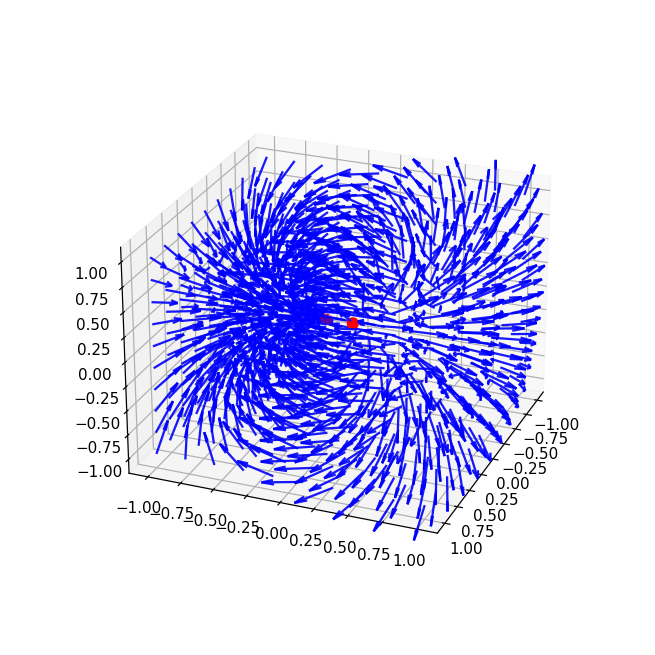

In [142]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection='3d')

for i in range(N):
    for j in range(N):
        for k in range(N):
            ax.quiver(x[i],y[j],z[k],Ex[i,j,k],Ey[i,j,k],Ez[i,j,k],color='b',alpha=0.9,length=0.3,normalize=True)
        
ax.scatter(rq[:,0],rq[:,1],rq[:,2],color='r',s=50)